# Heart Disease Classification problem

This notebook looks into Heart Disease dataset using various Python libraries to build a ML model for prediction
whether or not someone has heart disease based on their medical attributes.

Plan:
1) Problem definition
2) Data
3) Evaluation
4) Features 
5) Modeling
6) Experimentation


# 1. Problem definition: 
binary classification problem, 2 classes, has heart disase, doesn't have heart disease
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# 2. Data:
The data came from the Clevland data from the UCI ML Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# 3. Problem Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept,
we'll pursue the project.

# 4. Features

Dataset dictionary:

1. The following are the features we'll use to predict our target variable (heart disease or no heart disease).

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
     0: Nothing to note
     1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
* thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [46]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Loading Data

In [47]:
# Loading data
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data Exploration (EDA)

In [48]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [50]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

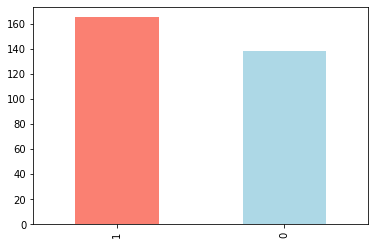

In [51]:
# There is balanced problem, number of rows with 1 and 0 are almost equal.
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [55]:
# Compare different columns - features

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [56]:
# Compare sex and target
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

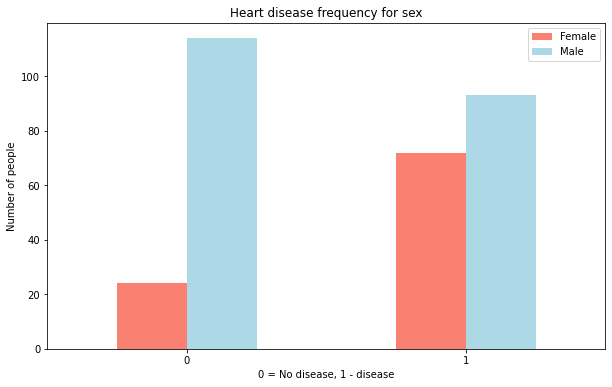

In [57]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No disease, 1 - disease")
plt.ylabel("Number of people")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

# comparing visually male and female who have heart disease it is 3 to 1, female is 3 times more than male


In [58]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

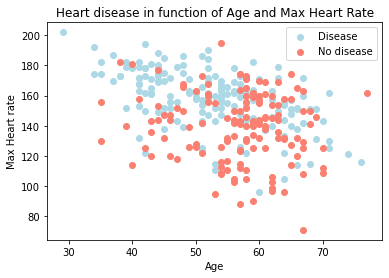

In [59]:
# Age vs Max Heart Rate for Heart Disease
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='lightblue')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='salmon')
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No disease"])



<AxesSubplot:ylabel='Frequency'>

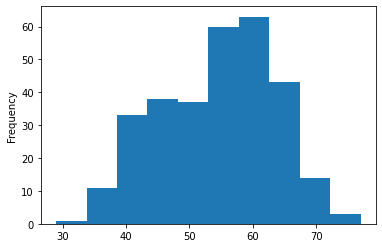

In [60]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

# Age values have a normal distribution
# The majority of people in our dataset are in 50-60 years range

In [61]:
# Compare chest pain and target columns
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


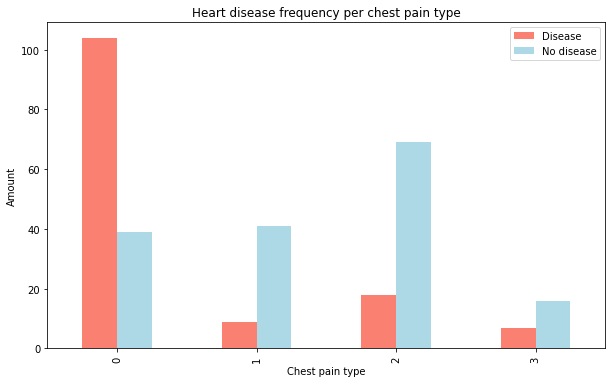

In [62]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["Disease", "No disease"])

In [63]:
# Compute pairwise correlation of columns
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


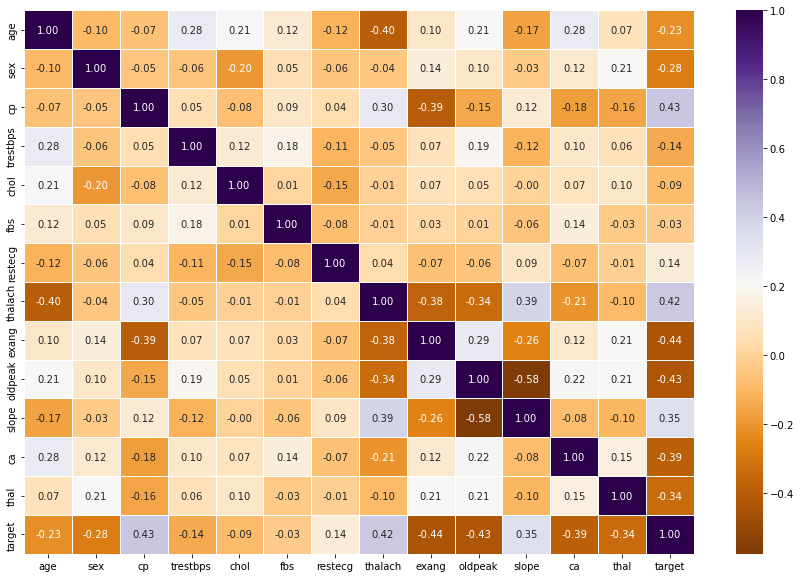

In [64]:
# Let's see correlation between all columns
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="PuOr")


# 5. Modeling

In [65]:
# Split data into X and Y
X = df.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [66]:
y = df["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [67]:
# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic Regression
# K-Neighbors classifier
# RandomForest Classifier

models = {"Logistic Regression" : LogisticRegression(),
           "KNN" : KNeighborsClassifier(),
           "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the model 
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

/Users/olga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


<AxesSubplot:>

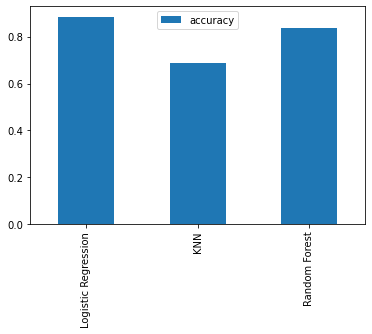

In [73]:
# The best model in terms of its accuracy for our problem is Logistic Regresion, 
# We choose Logistic Regression as our baseline model.
model_compare.T.plot.bar()

# 6. Experimentation
# Tuning hyperparameters

In [ ]:
# Metrics specific to classification problem
# Confusion matrix
# Precision
# Recall
# F1 score
# Classification report
# Roc curve
# Area under the curve

# Tuning  K-Neighbors classifier model by changing neighbors param from 1 to 20, default is 5.

168 video


In [102]:
model= KNeighborsClassifier()
train_scores = []
test_scores = []
for i in range(2, 21):
    model.set_params(n_neighbors = i)
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    
    model.fit(X_test, y_test)
    score_test = model.score(X_test, y_test)

    train_scores.append(score)
    test_scores.append(score_test)

train_scores

[0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [103]:
test_scores
# Best result is 0.8 on test data

[0.7540983606557377,
 0.8032786885245902,
 0.7540983606557377,
 0.819672131147541,
 0.7540983606557377,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836]

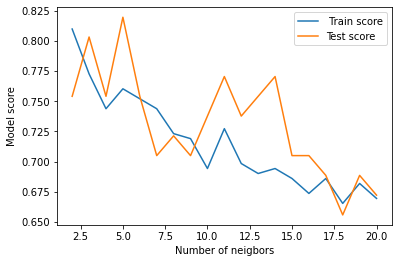

In [105]:
plt.plot(range(2, 21), train_scores, label=" Train score")
plt.plot(range(2, 21), test_scores, label="Test score")
plt.xlabel("Number of neigbors")
plt.ylabel("Model score")
plt.legend()

# Tuning Logistic Regression and Random Forest models with cross-validation RandomizedSearchCV


# Tune parameters:
# LogisticRegression hyperparameters - c, solver
# RandomForestClassifier - n_estimators, max_depth, min_samples_split, min_samples_lead

In [116]:
# Create a hyperparameter grid for LogisticRegression
c - regularization, 
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [117]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
print(rs_log_reg.best_params_)

rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'solver': 'liblinear', 'C': 0.23357214690901212}


0.8852459016393442

In [118]:
# Tune RandomForestClassifier
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [121]:
# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)
print(rs_rf.best_params_)

rs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 960, 'min_samples_split': 14, 'min_samples_leaf': 11, 'max_depth': 3}


0.8688524590163934

In [ ]:
# LogisticRegression model shows the best results even with cross-validation.


# Making predictions using tuned Logistic Regression model

In [123]:
y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

# Evaluating a model
ROC curve and AUC score, Confusion matrix, Classification Report, Precision, Recall, F1-score

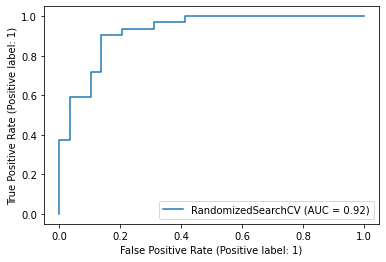

In [124]:
# ROC curve and AUC score
plot_roc_curve(rs_log_reg, X_test, y_test)

[[25  4]
 [ 3 29]]


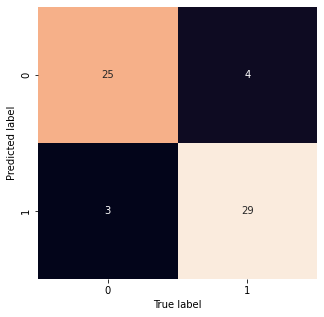

In [131]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))


def plot_confusion_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                                      annot=True,
                                      cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_confusion_matrix(y_test, y_preds)

In [135]:
# Classification report
class_report = classification_report(y_test, y_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Feature Importance for LogisticRegression model

Model driven EDA

Which features contribute most to the outcomes of the model?

In [137]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [140]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')
clf.fit(X_train, y_train)

# check coef_
clf.coef_

array([[ 0.00369922, -0.90424093,  0.67472825, -0.0116134 , -0.00170364,
         0.04787688,  0.33490202,  0.02472938, -0.63120409, -0.57590967,
         0.4709515 , -0.65165346, -0.69984211]])

In [142]:
# Match coef's of features to columns
feature_dictionary = dict(zip(df.columns, list(clf.coef_[0])))
feature_dictionary

{'age': 0.003699221787209125,
 'sex': -0.904240932671519,
 'cp': 0.6747282494564868,
 'trestbps': -0.011613400045442724,
 'chol': -0.0017036437736534262,
 'fbs': 0.04787687646226294,
 'restecg': 0.33490201513999257,
 'thalach': 0.024729382295865687,
 'exang': -0.6312040903432506,
 'oldpeak': -0.5759096739095448,
 'slope': 0.47095150136921937,
 'ca': -0.6516534612056029,
 'thal': -0.699842113346021}

<AxesSubplot:title={'center':'Feature importance'}>

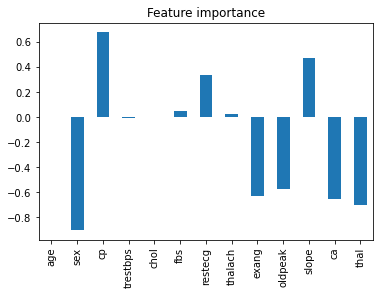

In [143]:
# Visualize feature importance
# Model driven data analysis
feature_df = pd.DataFrame(feature_dictionary, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False)

In [144]:
pd.crosstab(df["sex"], df["target"])

#as sex increase the taget ratio goes down, as the correlation is negative

target,0,1
sex,,
0,24,72
1,114,93


In [145]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [ ]:
# cholestoral doesn't influence target, it can be scrapped from data collection in the future,
# model features can be reduced.


We haven't met our evaluation metric of 95%,
we can try other models like CatBoost or XGBoost